In [331]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [332]:
df=pd.read_csv("C:\\Users\\gaura\\Downloads\\archive (12)\\Churn_Modelling.csv")

In [333]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [334]:
df.shape

(10000, 14)

In [335]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [336]:
geography_count=df['Geography'].value_counts()

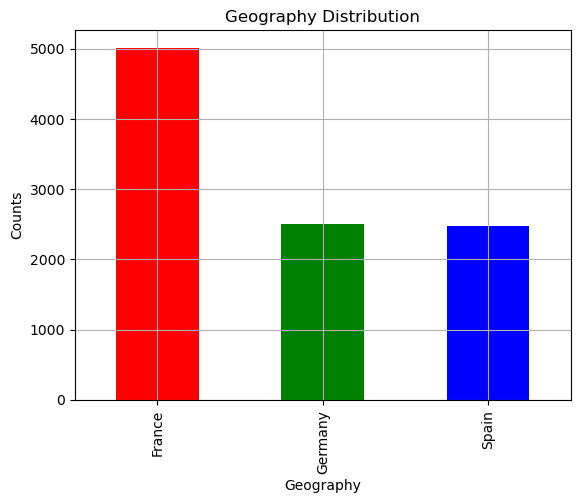

In [337]:
geography_count.plot(kind='bar',color=colors[:len(geography_count)])
colors=['red','green','blue']
plt.title('Geography Distribution')
plt.xlabel('Geography')
plt.ylabel('Counts')
plt.grid()

In [338]:
active_members=df['IsActiveMember'].value_counts()

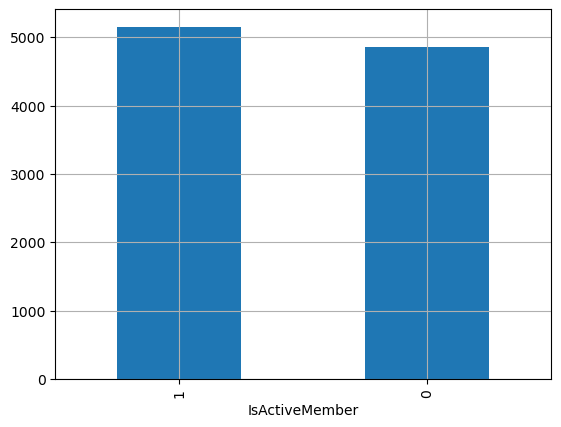

In [339]:
active_members.plot(kind='bar')
plt.grid()

In [340]:
gender_count=df['Gender'].value_counts()

<Axes: ylabel='count'>

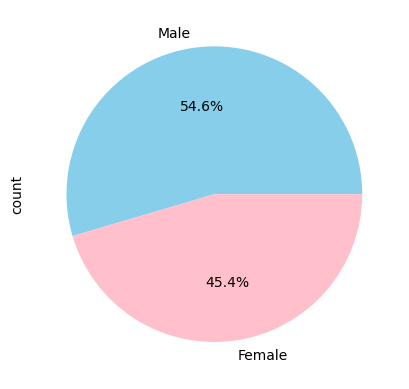

In [341]:
color=['skyblue','pink']
gender_count.plot(kind='pie',colors=color,autopct='%1.1f%%')

Text(0, 0.5, 'salary')

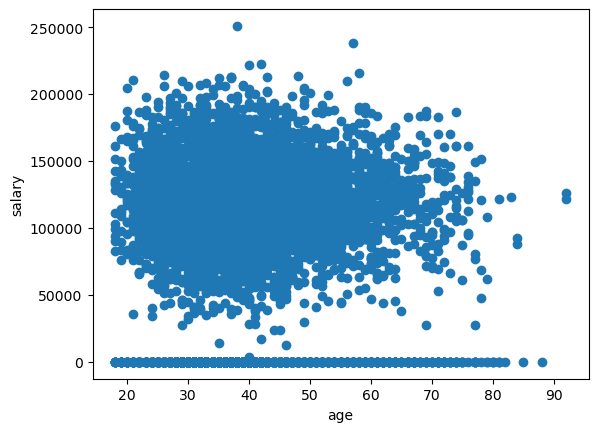

In [342]:
plt.scatter(df['Age'],df['Balance'])
plt.xlabel('age')
plt.ylabel('salary')

In [343]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [344]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [345]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [346]:
le=LabelEncoder()

In [347]:
columns=['Geography','Gender']
for column in columns:
    df[column]=le.fit_transform(df[column])

In [348]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [349]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [350]:
columns=['Balance','EstimatedSalary','Age','CreditScore','NumOfProducts','Tenure']
for column in columns:
    df[column]=scaler.fit_transform(df[[column]])

In [351]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,2,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,0,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,0,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,2,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0


In [352]:
X = df.drop('Exited',axis=1)
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)



In [353]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [354]:
lr.fit(X_train,y_train)

LogisticRegression()

In [355]:
y_pred=lr.predict(X_test)

In [356]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1578
           1       0.69      0.18      0.29       422

    accuracy                           0.81      2000
   macro avg       0.75      0.58      0.59      2000
weighted avg       0.79      0.81      0.76      2000



In [357]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [358]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [359]:
lr.fit(X_train_resampled,y_train_resampled)

LogisticRegression()

In [360]:
y_pred=lr.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.69      0.78      1578
           1       0.37      0.68      0.48       422

    accuracy                           0.69      2000
   macro avg       0.63      0.68      0.63      2000
weighted avg       0.78      0.69      0.71      2000



In [361]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)

In [362]:
model.fit(X_train_resampled,y_train_resampled)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1578
           1       0.61      0.61      0.61       422

    accuracy                           0.84      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



In [363]:
param_grid={
    'n_estimators':[100,200,300],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [364]:
from sklearn.model_selection import GridSearchCV

In [365]:
grid_search=GridSearchCV(estimator=model,
                         param_grid=param_grid,
                         cv=5,
                         n_jobs=-1)

In [366]:
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [367]:
best_params = grid_search.best_params_
print(best_params)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [368]:
best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1578
           1       0.60      0.61      0.61       422

    accuracy                           0.83      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.83      0.83      0.83      2000



In [369]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [370]:
y_pred=xgb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1578
           1       0.66      0.59      0.63       422

    accuracy                           0.85      2000
   macro avg       0.78      0.76      0.77      2000
weighted avg       0.85      0.85      0.85      2000



In [371]:
param_grid={
    'n_estimators':[100,200,300],
    'learning_rate':[0.001,0.1,0.2],
    'max_depth':[None,3,4,6],
}

In [372]:
grid_search=GridSearchCV(estimator=xgb,
                         param_grid=param_grid,
                         cv=5,
                         n_jobs=-1)

In [373]:
grid_search.fit(X_train_resampled,y_train_resampled)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 0.2],
                         'max_depth': [None, 3, 4, 6],
                         'n_estimators': [100, 200, 300]})

In [374]:
best_params = grid_search.best_params_
print(best_params)

{'learning_rate': 0.2, 'max_depth': None, 'n_estimators': 100}


In [375]:
best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1578
           1       0.65      0.59      0.62       422

    accuracy                           0.85      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.84      0.85      0.84      2000



In [377]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_metric = confusion_matrix(y_test, y_pred)
confusion_metric

array([[1443,  135],
       [ 174,  248]], dtype=int64)

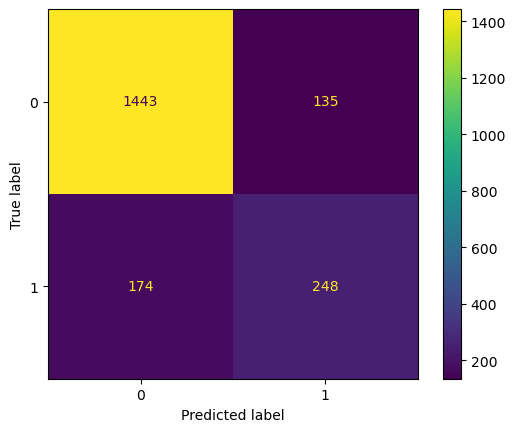

In [378]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=confusion_metric, display_labels=[0, 1])
cm_display.plot()